[*********************100%%**********************]  3 of 3 completed


EUR/USD Linear Regression MSE: 7.473739774896605e-33
EUR/USD Linear Regression R2: 1.0
EUR/USD Random Forest MSE: 1.397608762728942e-08
EUR/USD Random Forest R2: 0.9992391706414496
JPY Linear Regression MSE: 2.7564826582887167e-32
JPY Linear Regression R2: 1.0
JPY Random Forest MSE: 2.9296143826585935e-08
JPY Random Forest R2: 0.9989594668182856


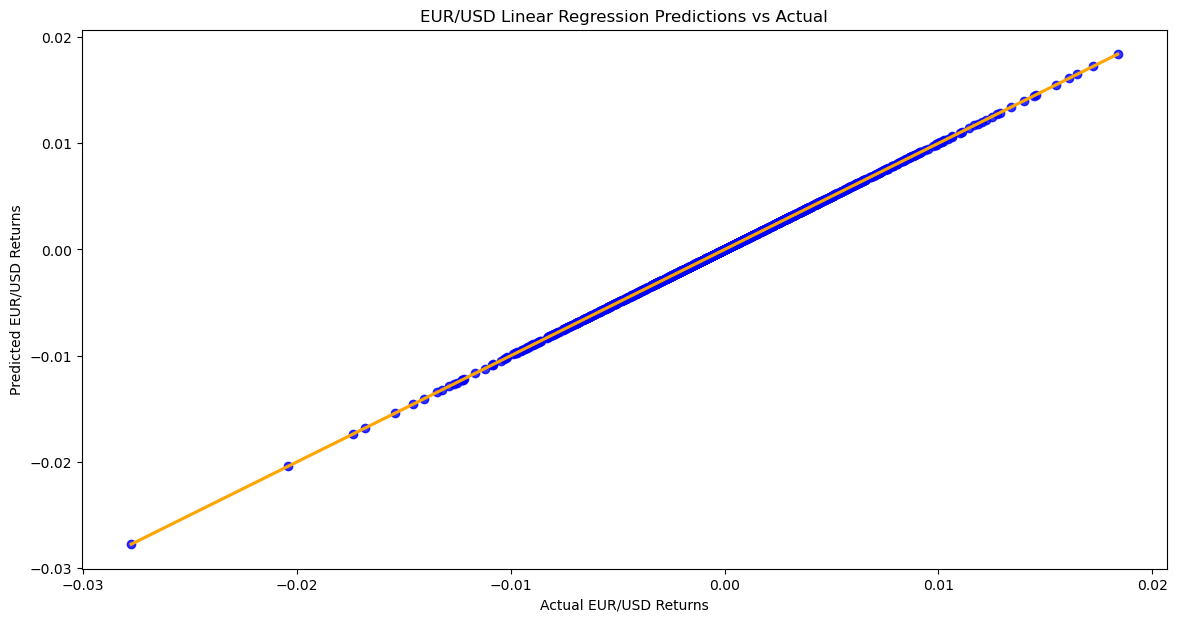

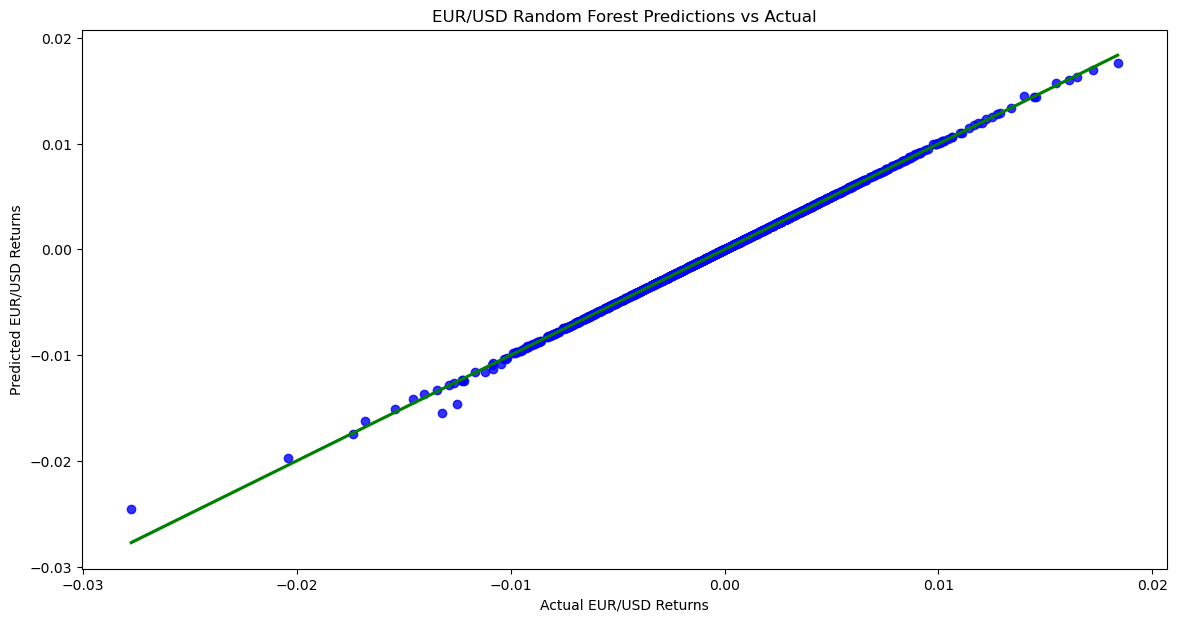

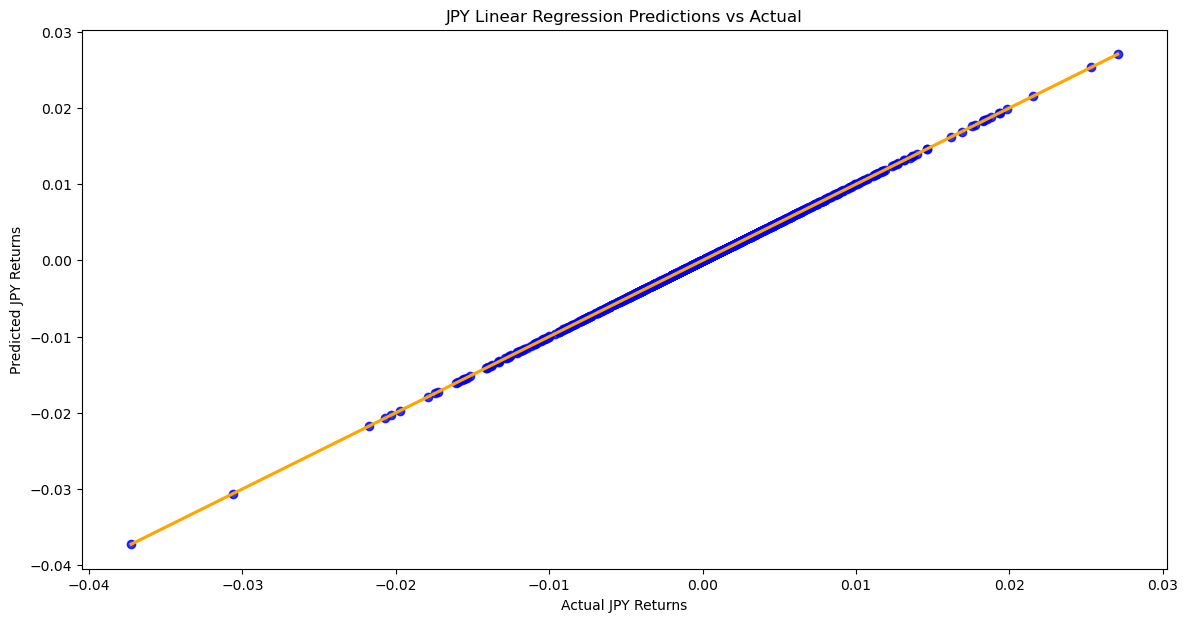

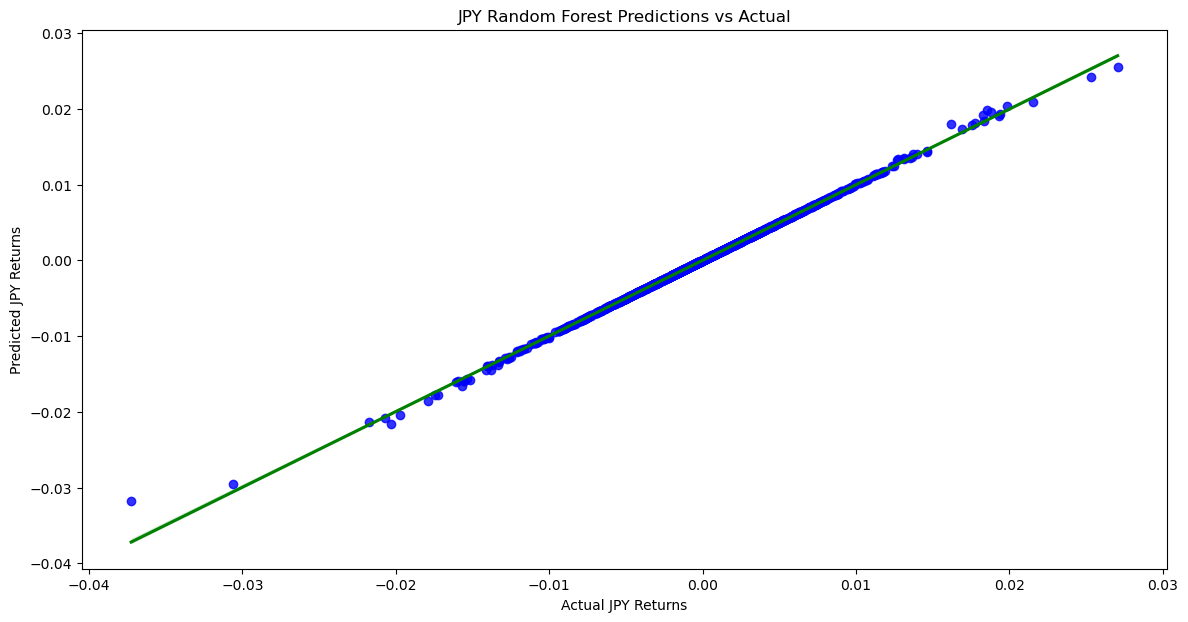

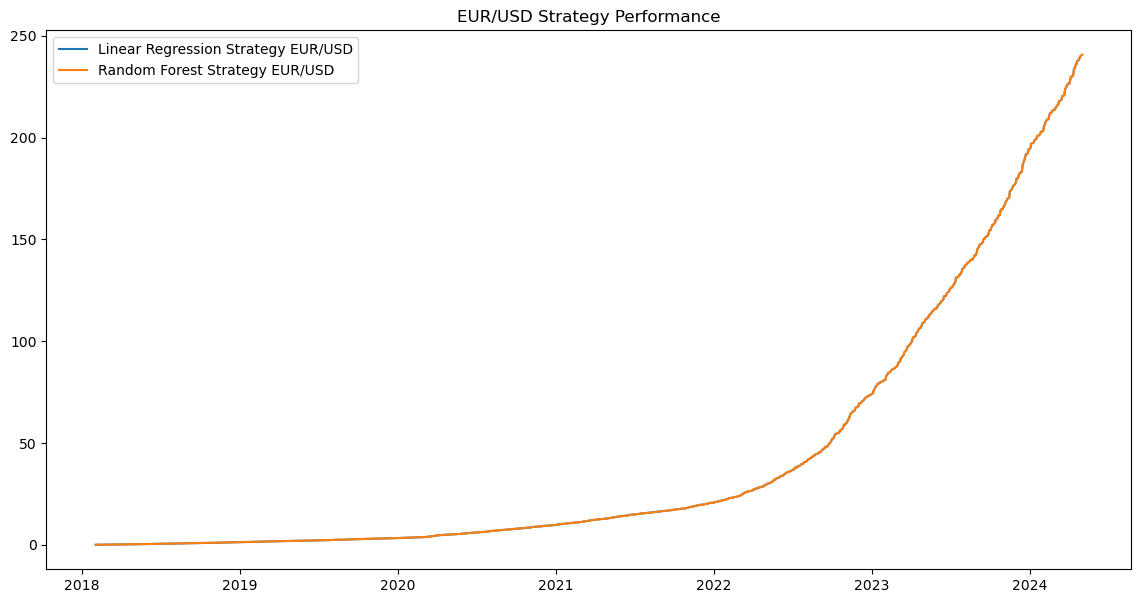

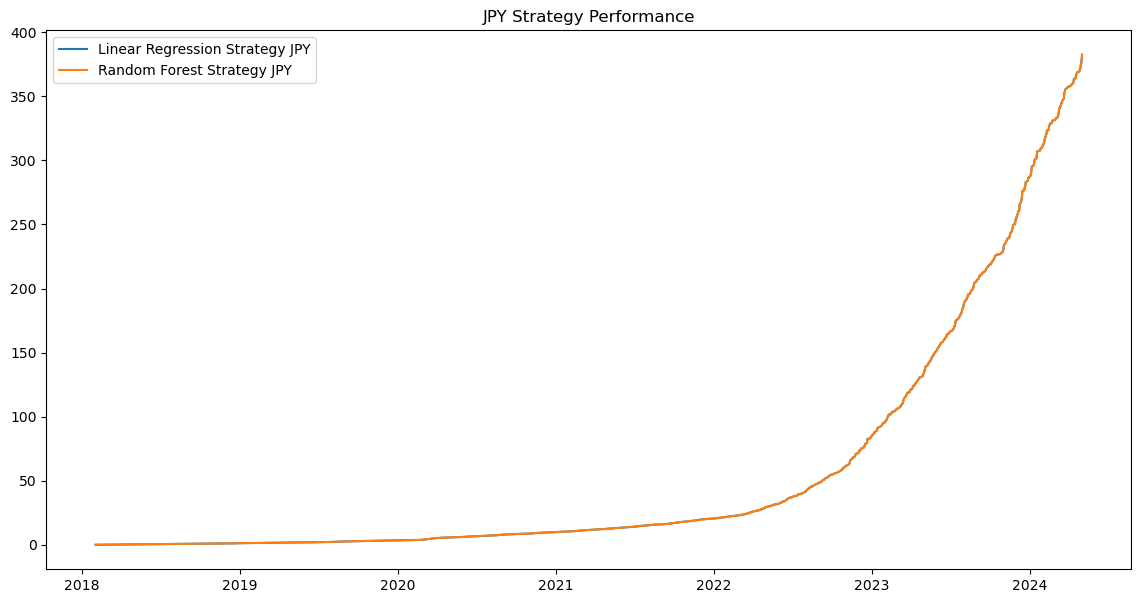

Classification Report for EUR/USD Linear Regression:


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [1]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Collection
assets = ['EURUSD=X', '^GSPC', 'JPY=X']
data = yf.download(assets, start='2017-05-01', end='2024-05-01')
data = data.ffill()

# Step 2: Feature Engineering
data['EURUSD_Return'] = data['Adj Close']['EURUSD=X'].pct_change()
data['SP500_Return'] = data['Adj Close']['^GSPC'].pct_change()
data['JPY_Return'] = data['Adj Close']['JPY=X'].pct_change()

data['EURUSD_MA50'] = data['Adj Close']['EURUSD=X'].rolling(window=50).mean()
data['EURUSD_MA200'] = data['Adj Close']['EURUSD=X'].rolling(window=200).mean()
data['SP500_MA50'] = data['Adj Close']['^GSPC'].rolling(window=50).mean()
data['SP500_MA200'] = data['Adj Close']['^GSPC'].rolling(window=200).mean()
data['JPY_MA50'] = data['Adj Close']['JPY=X'].rolling(window=50).mean()
data['JPY_MA200'] = data['Adj Close']['JPY=X'].rolling(window=200).mean()

data = data.dropna()

features = [
    'EURUSD_Return', 'EURUSD_MA50', 'EURUSD_MA200',
    'SP500_Return', 'SP500_MA50', 'SP500_MA200',
    'JPY_Return', 'JPY_MA50', 'JPY_MA200'
]
eurusd_target = 'EURUSD_Return'
jpy_target = 'JPY_Return'
eurusd_classification_target = 'EURUSD_Classification'
jpy_classification_target = 'JPY_Classification'

# Create classification targets
data[eurusd_classification_target] = data[eurusd_target].apply(lambda x: 1 if x > 0 else 0)
data[jpy_classification_target] = data[jpy_target].apply(lambda x: 1 if x > 0 else 0)

# Step 3: Model Training for EUR/USD Regression
X = data[features]
y_eurusd = data[eurusd_target]
y_jpy = data[jpy_target]
X_train, X_test, y_train_eurusd, y_test_eurusd = train_test_split(X, y_eurusd, test_size=0.2, random_state=42)
_, _, y_train_jpy, y_test_jpy = train_test_split(X, y_jpy, test_size=0.2, random_state=42)

lr_model_eurusd = LinearRegression()
lr_model_eurusd.fit(X_train, y_train_eurusd)

rf_model_eurusd = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_eurusd.fit(X_train, y_train_eurusd)

lr_model_jpy = LinearRegression()
lr_model_jpy.fit(X_train, y_train_jpy)

rf_model_jpy = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_jpy.fit(X_train, y_train_jpy)

y_pred_lr_eurusd = lr_model_eurusd.predict(X_test)
y_pred_rf_eurusd = rf_model_eurusd.predict(X_test)

y_pred_lr_jpy = lr_model_jpy.predict(X_test)
y_pred_rf_jpy = rf_model_jpy.predict(X_test)

print("EUR/USD Linear Regression MSE:", mean_squared_error(y_test_eurusd, y_pred_lr_eurusd))
print("EUR/USD Linear Regression R2:", r2_score(y_test_eurusd, y_pred_lr_eurusd))
print("EUR/USD Random Forest MSE:", mean_squared_error(y_test_eurusd, y_pred_rf_eurusd))
print("EUR/USD Random Forest R2:", r2_score(y_test_eurusd, y_pred_rf_eurusd))

print("JPY Linear Regression MSE:", mean_squared_error(y_test_jpy, y_pred_lr_jpy))
print("JPY Linear Regression R2:", r2_score(y_test_jpy, y_pred_lr_jpy))
print("JPY Random Forest MSE:", mean_squared_error(y_test_jpy, y_pred_rf_jpy))
print("JPY Random Forest R2:", r2_score(y_test_jpy, y_pred_rf_jpy))

# Step 4: Prediction and Visualization for EUR/USD and JPY Regression
future_returns_lr_eurusd = lr_model_eurusd.predict(X)
future_returns_rf_eurusd = rf_model_eurusd.predict(X)

future_returns_lr_jpy = lr_model_jpy.predict(X)
future_returns_rf_jpy = rf_model_jpy.predict(X)

data['LR_Predictions_EURUSD'] = future_returns_lr_eurusd
data['RF_Predictions_EURUSD'] = future_returns_rf_eurusd

data['LR_Predictions_JPY'] = future_returns_lr_jpy
data['RF_Predictions_JPY'] = future_returns_rf_jpy

# Scatter plots with line of best fit for EUR/USD
plt.figure(figsize=(14, 7))
sns.regplot(x=data[eurusd_target], y=data['LR_Predictions_EURUSD'], line_kws={"color": "orange"}, scatter_kws={"color": "blue"})
plt.title('EUR/USD Linear Regression Predictions vs Actual')
plt.xlabel('Actual EUR/USD Returns')
plt.ylabel('Predicted EUR/USD Returns')
plt.show()

plt.figure(figsize=(14, 7))
sns.regplot(x=data[eurusd_target], y=data['RF_Predictions_EURUSD'], line_kws={"color": "green"}, scatter_kws={"color": "blue"})
plt.title('EUR/USD Random Forest Predictions vs Actual')
plt.xlabel('Actual EUR/USD Returns')
plt.ylabel('Predicted EUR/USD Returns')
plt.show()

# Scatter plots with line of best fit for JPY
plt.figure(figsize=(14, 7))
sns.regplot(x=data[jpy_target], y=data['LR_Predictions_JPY'], line_kws={"color": "orange"}, scatter_kws={"color": "blue"})
plt.title('JPY Linear Regression Predictions vs Actual')
plt.xlabel('Actual JPY Returns')
plt.ylabel('Predicted JPY Returns')
plt.show()

plt.figure(figsize=(14, 7))
sns.regplot(x=data[jpy_target], y=data['RF_Predictions_JPY'], line_kws={"color": "green"}, scatter_kws={"color": "blue"})
plt.title('JPY Random Forest Predictions vs Actual')
plt.xlabel('Actual JPY Returns')
plt.ylabel('Predicted JPY Returns')
plt.show()

# Step 5: Decision Making for EUR/USD and JPY Regression
data['Signal_LR_EURUSD'] = data['LR_Predictions_EURUSD'].apply(lambda x: 1 if x > 0 else -1)
data['Signal_RF_EURUSD'] = data['RF_Predictions_EURUSD'].apply(lambda x: 1 if x > 0 else -1)

data['Signal_LR_JPY'] = data['LR_Predictions_JPY'].apply(lambda x: 1 if x > 0 else -1)
data['Signal_RF_JPY'] = data['RF_Predictions_JPY'].apply(lambda x: 1 if x > 0 else -1)

data['Strategy_Returns_LR_EURUSD'] = data['Signal_LR_EURUSD'] * data['EURUSD_Return']
data['Strategy_Returns_RF_EURUSD'] = data['Signal_RF_EURUSD'] * data['EURUSD_Return']

data['Strategy_Returns_LR_JPY'] = data['Signal_LR_JPY'] * data['JPY_Return']
data['Strategy_Returns_RF_JPY'] = data['Signal_RF_JPY'] * data['JPY_Return']

plt.figure(figsize=(14, 7))
plt.plot((1 + data['Strategy_Returns_LR_EURUSD']).cumprod() - 1, label='Linear Regression Strategy EUR/USD')
plt.plot((1 + data['Strategy_Returns_RF_EURUSD']).cumprod() - 1, label='Random Forest Strategy EUR/USD')
plt.legend()
plt.title('EUR/USD Strategy Performance')
plt.show()

plt.figure(figsize=(14, 7))
plt.plot((1 + data['Strategy_Returns_LR_JPY']).cumprod() - 1, label='Linear Regression Strategy JPY')
plt.plot((1 + data['Strategy_Returns_RF_JPY']).cumprod() - 1, label='Random Forest Strategy JPY')
plt.legend()
plt.title('JPY Strategy Performance')
plt.show()

# Step 6: Model Training for EUR/USD Classification
y_class_eurusd = data[eurusd_classification_target]
X_train_class_eurusd, X_test_class_eurusd, y_train_class_eurusd, y_test_class_eurusd = train_test_split(X, y_class_eurusd, test_size=0.2, random_state=42)

lr_model_class_eurusd = LinearRegression()
lr_model_class_eurusd.fit(X_train_class_eurusd, y_train_class_eurusd)

rf_model_class_eurusd = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_class_eurusd.fit(X_train_class_eurusd, y_train_class_eurusd)

y_pred_lr_class_eurusd = lr_model_class_eurusd.predict(X_test_class_eurusd)
y_pred_rf_class_eurusd = rf_model_class_eurusd.predict(X_test_class_eurusd)

# Print classification reports for EUR/USD
print("Classification Report for EUR/USD Linear Regression:")
print(classification_report(y_test_class_eurusd, y_pred_lr_class_eurusd))

print("Classification Report for EUR/USD Random Forest:")
print(classification_report(y_test_class_eurusd, y_pred_rf_class_eurusd))

# Step 7: Model Training for JPY Classification
y_class_jpy = data[jpy_classification_target]
X_train_class_jpy, X_test_class_jpy, y_train_class_jpy, y_test_class_jpy = train_test_split(X, y_class_jpy, test_size=0.2, random_state=42)

lr_model_class_jpy = LinearRegression()
lr_model_class_jpy.fit(X_train_class_jpy, y_train_class_jpy)

rf_model_class_jpy = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_class_jpy.fit(X_train_class_jpy, y_train_class_jpy)

y_pred_lr_class_jpy = lr_model_class_jpy.predict(X_test_class_jpy)
y_pred_rf_class_jpy = rf_model_class_jpy.predict(X_test_class_jpy)

# Print classification reports for JPY
print("Classification Report for JPY Linear Regression:")
print(classification_report(y_test_class_jpy, y_pred_lr_class_jpy))

print("Classification Report for JPY Random Forest:")
print(classification_report(y_test_class_jpy, y_pred_rf_class_jpy))
